### 초기설정

In [1]:
%%capture
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [2]:
import pandas as pd

df_2023 = pd.read_excel('/content/2023.xlsx')
df_2024 = pd.read_excel('/content/2024.xlsx')

In [3]:
country_map = {
    1: '일본',
    2: '중국',
    3: '홍콩',
    4: '싱가포르',
    5: '대만',
    6: '태국',
    7: '말레이시아',
    8: '호주',
    9: '미국',
    10: '캐나다',
    11: '영국',
    12: '독일',
    13: '프랑스',
    14: '러시아',
    15: '중동',
    16: '인도',
    17: '필리핀',
    18: '인도네시아',
    19: '베트남',
    20: '몽골',
    97: '기타'
}

df_2023['국가명'] = df_2023['D_NAT'].map(country_map)
df_2024['국가명'] = df_2024['D_NAT'].map(country_map)

- 활동명 매핑 (주요활동/만족활동) - 2023~2024

In [4]:
# 1. 활동명 매핑
q8a_mapping_2023 = {
    "Q8a01": "식도락(음식/미식) 관광", "Q8a02": "쇼핑", "Q8a03": "자연경관 감상", "Q8a04": "고궁/역사 유적지 방문",
    "Q8a05": "전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)", "Q8a06": "박물관, 전시관 관람",
    "Q8a07": "K-POP/한류스타 공연장 및 드라마/영화 촬영지 방문", "Q8a08": "연극, 뮤지컬, 발레 등 공연 관람",
    "Q8a09": "지역 축제 참여", "Q8a10": "유흥(나이트라이프 활동 및 카지노 등)", "Q8a11": "오락(놀이공원 및 테마파크 방문 등)",
    "Q8a12": "뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)", "Q8a13": "치료/건강검진(피부과, 성형외과, 내외과 등 입원, 수술 등)",
    "Q8a14": "스포츠/레포츠 관람 (야구, 축구, 농구 등)", "Q8a15": "스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑 등)",
    "Q8a16": "국제회의(컨벤션, 국제회의, 전시 등)", "Q8a17": "비즈니스 전문활동(업무회의, 산업시설 시찰 등)",
    "Q8a18": "연수, 교육, 연구", "Q8a19": "기타"
}

q8b_code_mapping_2023 = {
    1: "식도락(음식/미식) 관광", 2: "쇼핑", 3: "자연경관 감상", 4: "고궁/역사 유적지 방문",
    5: "전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)", 6: "박물관, 전시관 관람",
    7: "K-POP/한류스타 공연장 및 드라마/영화 촬영지 방문", 8: "연극, 뮤지컬, 발레 등 공연 관람",
    9: "지역 축제 참여", 10: "유흥(나이트라이프 활동 및 카지노 등)",
    11: "오락(놀이공원 및 테마파크 방문 등)", 12: "뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)",
    13: "치료/건강검진(피부과, 성형외과, 내외과 등 입원, 수술 등)", 14: "스포츠/레포츠 관람 (야구, 축구, 농구 등)",
    15: "스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑 등)", 16: "국제회의(컨벤션, 국제회의, 전시 등)",
    17: "비즈니스 전문활동(업무회의, 산업시설 시찰 등)", 18: "연수, 교육, 연구", 19: "기타"
}

q8a_cols = list(q8a_mapping_2023.keys())
q8b_cols = ["Q8_1a1", "Q8_1a2", "Q8_1a3"]

# 2. 주요활동 추출 함수
def get_q8a_activities(row):
    return [q8a_mapping_2023[col] for col in q8a_cols if col in row and pd.notna(row[col])]

# 3. 만족활동 추출 함수
def get_q8b_satisfaction(row):
    return [q8b_code_mapping_2023.get(int(row[col]), f"코드 {row[col]}")
            for col in q8b_cols if col in row and pd.notna(row[col])]

# 4. 적용 (df_2023이 정의된 상태에서만)
df_2023["주요활동"] = df_2023.apply(get_q8a_activities, axis=1)
df_2023["만족활동"] = df_2023.apply(get_q8b_satisfaction, axis=1)

In [5]:
# 1. 활동명 매핑
q8a_mapping_2024 = {
    "Q8a01": "식도락(음식/미식) 관광", "Q8a02": "쇼핑", "Q8a03": "자연경관 감상", "Q8a04": "휴양/휴식(웰니스)",
    "Q8a05": "고궁/역사 유적지 방문", "Q8a06": "전통문화체험 (한복체험, 태권도, 한국 음식 만들기 등)",
    "Q8a07": "박물관, 전시관 관람", "Q8a08": "K-POP/한류스타 공연장 및 드라마/영화 촬영지 방문",
    "Q8a09": "연극, 뮤지컬, 발레 등 공연 관람", "Q8a10": "지역 축제 참여",
    "Q8a11": "유흥(나이트라이프 활동 및 카지노)", "Q8a12": "오락(놀이공원 및 테마파크 방문 등)",
    "Q8a13": "뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)", "Q8a14": "치료/건강검진(피부과, 성형외과, 내외과 입원, 수술 등)",
    "Q8a15": "스포츠/레포츠 관람 (야구, 축구, 농구 등)", "Q8a16": "스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑 등)",
    "Q8a17": "국제회의(컨벤션, 국제회의, 전시 등)", "Q8a18": "비즈니스 전문활동(업무회의, 산업시설 시찰 등)",
    "Q8a19": "연수, 교육, 연구", "Q8a20": "기타"
}

q8b_code_mapping_2024 = {
    1: "식도락(음식/미식) 관광", 2: "쇼핑", 3: "자연경관 감상", 4: "휴양/휴식(웰니스)",
    5: "고궁/역사 유적지 방문", 6: "전통문화체험 (한복체험, 태권도, 한국 음식 만들기 등)",
    7: "박물관, 전시관 관람", 8: "K-POP/한류스타 공연장 및 드라마/영화 촬영지 방문",
    9: "연극, 뮤지컬, 발레 등 공연 관람", 10: "지역 축제 참여",
    11: "유흥(나이트라이프 활동 및 카지노)", 12: "오락(놀이공원 및 테마파크 방문 등)",
    13: "뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)", 14: "치료/건강검진(피부과, 성형외과, 내외과 입원, 수술 등)",
    15: "스포츠/레포츠 관람 (야구, 축구, 농구 등)", 16: "스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑 등)",
    17: "국제회의(컨벤션, 국제회의, 전시 등)", 18: "비즈니스 전문활동(업무회의, 산업시설 시찰 등)",
    19: "연수, 교육, 연구", 20: "기타"
}

q8a_cols = list(q8a_mapping_2024.keys())
q8b_cols = ["Q8_1a1", "Q8_1a2", "Q8_1a3"]

# 2. 주요활동 추출 함수
def get_q8a_activities(row):
    return [q8a_mapping_2024[col] for col in q8a_cols if col in row and pd.notna(row[col])]

# 3. 만족활동 추출 함수
def get_q8b_satisfaction(row):
    return [q8b_code_mapping_2024.get(int(row[col]), f"코드 {row[col]}")
            for col in q8b_cols if col in row and pd.notna(row[col])]

# 4. 적용 (df_2024이 정의된 상태에서만 실행)
df_2024["주요활동"] = df_2024.apply(get_q8a_activities, axis=1)
df_2024["만족활동"] = df_2024.apply(get_q8b_satisfaction, axis=1)


In [ ]:
# df_2023.drop(columns=['방문지역'], inplace=True)
# df_2024.drop(columns=['방문지역'], inplace=True)

In [6]:
import pandas as pd

# 1. 지역 컬럼 정의
region_cols = [f"Q9_2a{str(i).zfill(2)}" for i in range(1, 18)]

# 2. 지역 코드 → 지역명 매핑
region_map = {
    1: "서울", 2: "경기", 3: "인천", 4: "강원", 5: "대전",
    6: "충북", 7: "충남", 8: "세종", 9: "경북", 10: "경남",
    11: "대구", 12: "울산", 13: "부산", 14: "광주", 15: "전북",
    16: "전남", 17: "제주"
}

# 3. 지역 리스트 추출 함수 (수정 버전)
def extract_visited_regions(row):
    visited = []
    for col in region_cols:
        val = row.get(col)
        if pd.notna(val):
            try:
                code = int(val)
                region = region_map.get(code)
                if region and region not in visited:
                    visited.append(region)
            except:
                continue
    return visited

# 4. 적용
df_2023["방문지역"] = df_2023.apply(extract_visited_regions, axis=1)
df_2024["방문지역"] = df_2024.apply(extract_visited_regions, axis=1)

# 5. 확인
print(df_2023[["pnid", "방문지역"]].head(10))
print(df_2024[["pnid", "방문지역"]].head(10))

   pnid          방문지역
0     6      [서울, 강원]
1     7          [서울]
2     8          [인천]
3    10          [서울]
4    11      [서울, 인천]
5    12          [서울]
6    14      [서울, 강원]
7    16          [경기]
8    19  [서울, 강원, 부산]
9    20      [서울, 강원]
   pnid      방문지역
0    57      [서울]
1    58      [서울]
2    59      [서울]
3    60      [서울]
4    61  [서울, 경기]
5    63  [서울, 경기]
6    64  [서울, 경기]
7    66      [서울]
8    68      [서울]
9    69      [서울]


In [7]:
# 클러스터1 국가 리스트
cluster1_countries = ["미국", "영국", "독일", "프랑스", "캐나다", "호주", "기타"]

# 공통 국가 필터링 함수
def filter_cluster1(df):
    return df[df["국가명"].isin(cluster1_countries)].copy()

# 연도별 필터링
df_cluster1_2023 = filter_cluster1(df_2023)
df_cluster1_2024 = filter_cluster1(df_2024)

- 계절 컬럼 추가 (계절 분석 시 사용)

In [ ]:
import pandas as pd

# 월 → 계절 매핑 함수
def month_to_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:  # 12, 1, 2
        return 'Winter'

# 각 연도별 데이터프레임에 적용
# for df in [df_cluster1_2024, df_cluster1_2023, df_cluster1_2022]:
#     df['계절'] = df['D_MON'].apply(month_to_season)

for df in [df_cluster1_2024, df_cluster1_2023]:
    df['계절'] = df['D_MON'].apply(month_to_season)

- 2023년 활동 만족도 매핑 코드

In [8]:
# 1. 활동 코드 → 활동명 매핑
q12_2023_item_mapping = {
    "Q12a01": "식도락(음식)",
    "Q12a02": "쇼핑",
    "Q12a03": "자연경관 감상",
    "Q12a04": "고궁/역사 유적지 방문",
    "Q12a05": "전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)",
    "Q12a06": "박물관, 전시관 관람",
    "Q12a07": "K-POP/한류스타 관련 공연장 및 드라마/영화 촬영지 방문",
    "Q12a08": "연극, 뮤지컬, 발레 등 공연 관람",
    "Q12a09": "지역 축제 참여",
    "Q12a10": "유흥(나이트라이프 활동 및 카지노 등)",
    "Q12a11": "오락(놀이공원 및 테마파크 방문 등)",
    "Q12a12": "뷰티/미용 관광 (마사지샵, 헤어샵, 네일케어 등 방문)",
    "Q12a13": "치료/건강검진(피부과, 성형외과, 내‧외과 입원, 수술 등)",
    "Q12a14": "스포츠/레포츠 관람 (야구, 축구, 농구 등)",
    "Q12a15": "스포츠/레포츠 참가(스키, 수영, 골프, 캠핑 등)"
}

# 2. 매핑 함수
def extract_activity_satisfaction_2023(row):
    satisfaction_dict = {}
    for col, activity_name in q12_2023_item_mapping.items():
        if col in row and pd.notna(row[col]):
            score = row[col]
            if isinstance(score, (int, float)) and 1 <= score <= 5:
                satisfaction_dict[activity_name] = score
    return satisfaction_dict

# 3. 적용
df_cluster1_2023["활동만족도"] = df_cluster1_2023.apply(extract_activity_satisfaction_2023, axis=1)

In [9]:
# 1. 활동 코드 → 활동명 매핑
q12_2024_item_mapping = {
    "Q12a01": "식도락(음식/미식) 관광",
    "Q12a02": "쇼핑",
    "Q12a03": "자연경관 감상",
    "Q12a04": "휴양/휴식(웰니스)",
    "Q12a05": "고궁/역사 유적지 방문",
    "Q12a06": "전통문화체험 (한복체험, 태권도, 한국 음식 만들기 등)",
    "Q12a07": "박물관, 전시관 관람",
    "Q12a08": "K-POP/한류스타 관련 공연장 및 드라마/영화 촬영지 방문",
    "Q12a09": "연극, 뮤지컬, 발레 등 공연 관람",
    "Q12a10": "지역 축제 참여",
    "Q12a11": "유흥(나이트라이프 활동 및 카지노)",
    "Q12a12": "오락(놀이공원 및 테마파크 방문 등",
    "Q12a13": "뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)",
    "Q12a14": "치료/건강검진(피부과, 성형외과, 내외과 입원, 수술 등)",
    "Q12a15": "스포츠/레포츠 관람 (야구, 축구, 농구 등)",
    "Q12a16": "스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑, 등반, 자전거, 래프팅 등)",
}

# 2. 매핑 함수
def extract_activity_satisfaction_2024(row):
    satisfaction_dict = {}
    for col, activity_name in q12_2024_item_mapping.items():
        if col in row and pd.notna(row[col]):
            score = row[col]
            if isinstance(score, (int, float)) and 1 <= score <= 5:
                satisfaction_dict[activity_name] = score
    return satisfaction_dict

# 3. 적용
df_cluster1_2024["활동만족도"] = df_cluster1_2024.apply(extract_activity_satisfaction_2024, axis=1)

# 서울 제외 + 활동별 만족도 높은 지역 TOP5 추출

연관 분석에서 나온 활동

- 전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)
- 고궁/역사 유적지 방문
- 박물관, 전시관 관람
- 자연경관 감상
- 식도락(음식/미식) 관광
- 쇼핑

In [10]:
import pandas as pd

# 활동명 리스트 (2023, 2024 혼용 대비 포함)
target_activities = [
    "전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)",
    "고궁/역사 유적지 방문",
    "박물관, 전시관 관람",
    "자연경관 감상",
    "식도락(음식/미식) 관광",
    "쇼핑"
]

# TOP5 추출 함수 (서울 포함)
def extract_top5_regions(df, activity_name):
    rows = []

    for _, row in df.iterrows():
        if activity_name in row.get("활동만족도", {}) and isinstance(row.get("방문지역", []), list):
            score = row["활동만족도"][activity_name]
            weight = row.get("weight", 1)
            for region in row["방문지역"]:
                rows.append({
                    "region": region,
                    "score": score,
                    "weight": weight
                })

    region_df = pd.DataFrame(rows)

    if region_df.empty:
        return pd.DataFrame(columns=["region", "weighted_mean"])

    # 가중 평균 계산
    result = region_df.groupby("region").apply(
        lambda x: (x["score"] * x["weight"]).sum() / x["weight"].sum()
    ).reset_index(name="weighted_mean")

    # 상위 5개 추출
    top5 = result.sort_values(by="weighted_mean", ascending=False).head(5)
    return top5

# 사용 (연도별 출력)
for activity in target_activities:
    print(f"\n[2023] {activity}")
    display(extract_top5_regions(df_cluster1_2023, activity))

    print(f"\n[2024] {activity}")
    display(extract_top5_regions(df_cluster1_2024, activity))


[2023] 전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)


/tmp/ipython-input-10-1676467941.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = region_df.groupby("region").apply(


,region,weighted_mean
9,세종,4.885176
15,충남,4.788340
1,경기,4.730498
3,경북,4.726867
11,인천,4.719335



[2024] 전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)


,region,weighted_mean



[2023] 고궁/역사 유적지 방문


/tmp/ipython-input-10-1676467941.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = region_df.groupby("region").apply(


,region,weighted_mean
3,경북,4.887813
10,울산,4.864068
2,경남,4.831557
12,전남,4.819289
15,충남,4.796136



[2024] 고궁/역사 유적지 방문


/tmp/ipython-input-10-1676467941.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = region_df.groupby("region").apply(


,region,weighted_mean
5,대구,4.850040
12,전남,4.826619
11,인천,4.789105
3,경북,4.783998
2,경남,4.774665



[2023] 박물관, 전시관 관람


/tmp/ipython-input-10-1676467941.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = region_df.groupby("region").apply(


,region,weighted_mean
6,대전,4.868428
13,전북,4.835955
9,세종,4.825091
12,전남,4.748051
15,충남,4.726340



[2024] 박물관, 전시관 관람


/tmp/ipython-input-10-1676467941.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = region_df.groupby("region").apply(


,region,weighted_mean
12,전남,4.931324
0,강원,4.715650
15,충남,4.692815
3,경북,4.645970
8,서울,4.645951



[2023] 자연경관 감상


/tmp/ipython-input-10-1676467941.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = region_df.groupby("region").apply(


,region,weighted_mean
15,충남,4.955245
12,전남,4.896798
13,전북,4.858308
3,경북,4.801124
4,광주,4.785059



[2024] 자연경관 감상


/tmp/ipython-input-10-1676467941.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = region_df.groupby("region").apply(


,region,weighted_mean
12,전남,4.967052
10,울산,4.836546
11,인천,4.820824
0,강원,4.811608
4,광주,4.802472



[2023] 식도락(음식/미식) 관광


,region,weighted_mean



[2024] 식도락(음식/미식) 관광


/tmp/ipython-input-10-1676467941.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = region_df.groupby("region").apply(


,region,weighted_mean
5,대구,4.772461
0,강원,4.685227
11,인천,4.661254
16,충북,4.653507
6,대전,4.646204



[2023] 쇼핑


/tmp/ipython-input-10-1676467941.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = region_df.groupby("region").apply(


,region,weighted_mean
9,세종,4.802463
15,충남,4.762755
16,충북,4.688550
13,전북,4.623616
1,경기,4.607691



[2024] 쇼핑


/tmp/ipython-input-10-1676467941.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = region_df.groupby("region").apply(


,region,weighted_mean
15,충남,4.825261
11,인천,4.597281
8,서울,4.595870
12,전남,4.576616
0,강원,4.572000


/tmp/ipython-input-11-894010214.py:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = region_df.groupby("region").apply(


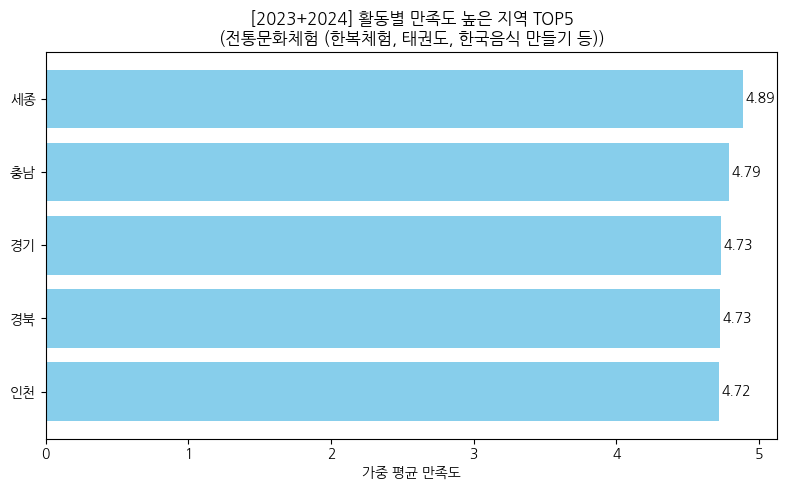

/tmp/ipython-input-11-894010214.py:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = region_df.groupby("region").apply(


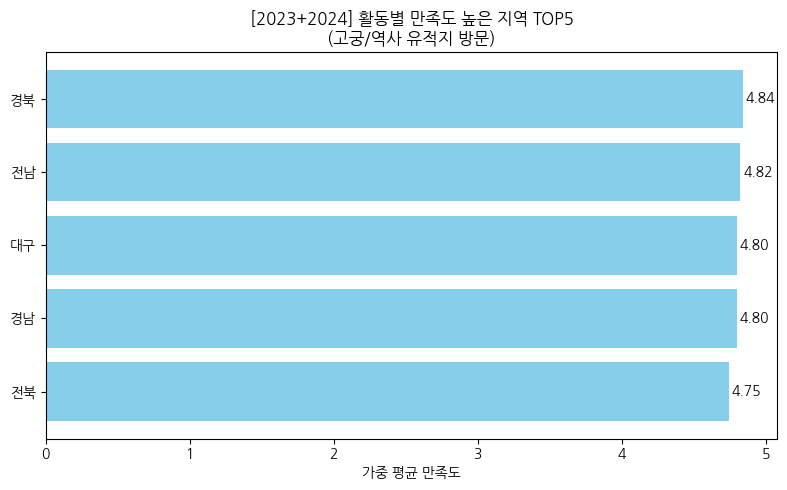

/tmp/ipython-input-11-894010214.py:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = region_df.groupby("region").apply(


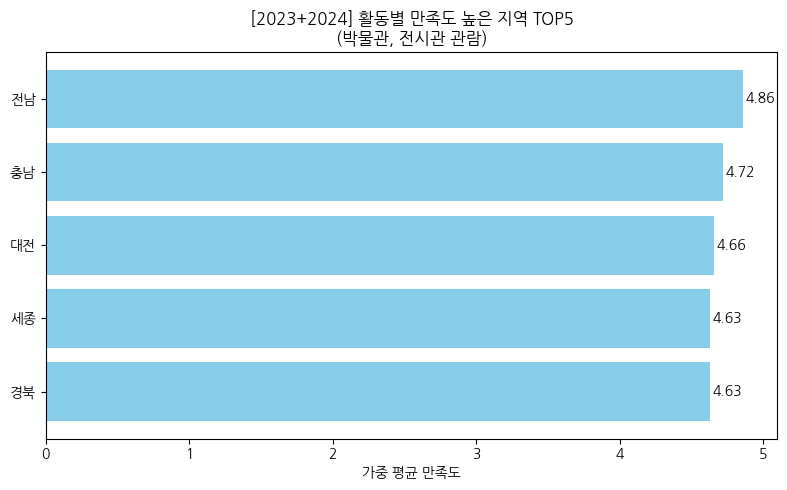

/tmp/ipython-input-11-894010214.py:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = region_df.groupby("region").apply(


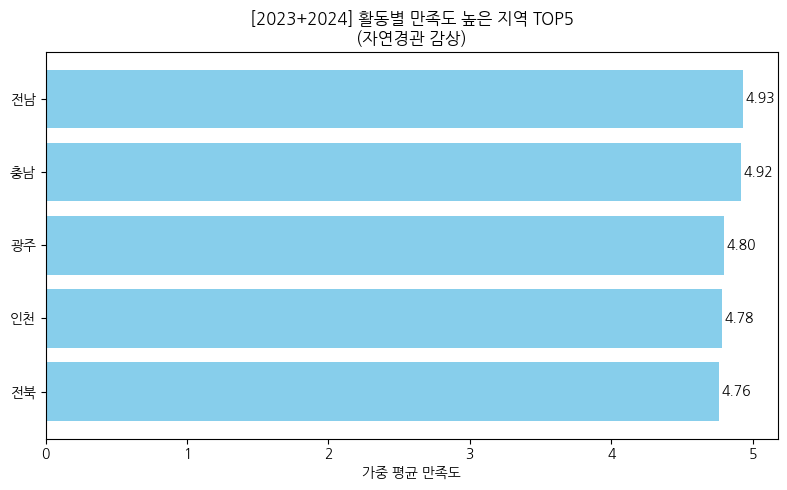

/tmp/ipython-input-11-894010214.py:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = region_df.groupby("region").apply(


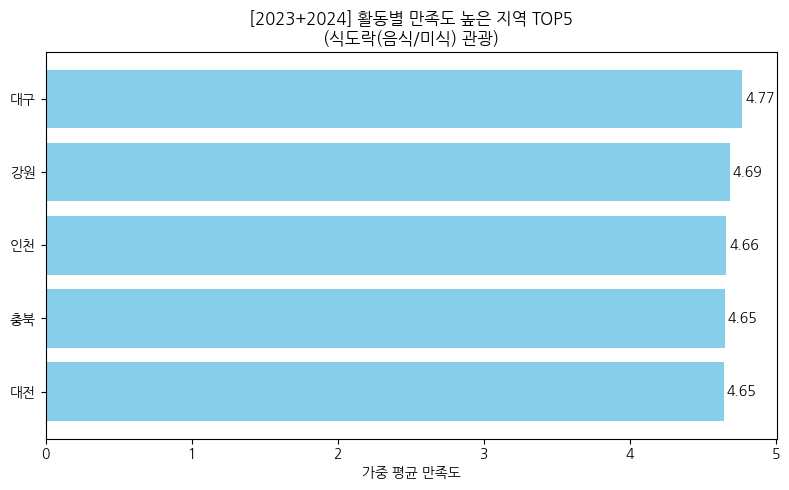

/tmp/ipython-input-11-894010214.py:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = region_df.groupby("region").apply(


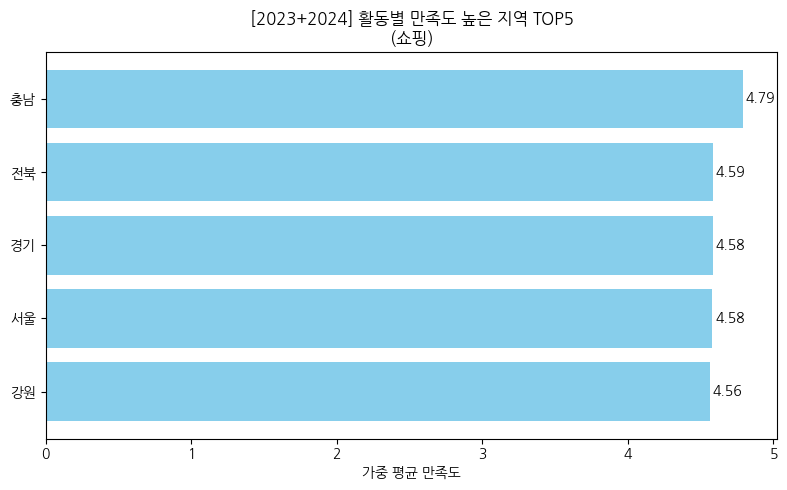

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# 활동 리스트
target_activities = [
    "전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)",
    "고궁/역사 유적지 방문",
    "박물관, 전시관 관람",
    "자연경관 감상",
    "식도락(음식/미식) 관광",
    "쇼핑"
]

# 2023, 2024 필요한 컬럼만 추출 후 병합
df_2023_trimmed = df_cluster1_2023[["활동만족도", "방문지역", "weight"]].copy()
df_2024_trimmed = df_cluster1_2024[["활동만족도", "방문지역", "weight"]].copy()
df_combined = pd.concat([df_2023_trimmed, df_2024_trimmed], ignore_index=True)

# TOP5 지역 추출 함수 (서울 포함)
def extract_top5_regions(df, activity_name):
    rows = []
    for _, row in df.iterrows():
        if activity_name in row.get("활동만족도", {}) and isinstance(row.get("방문지역", []), list):
            score = row["활동만족도"][activity_name]
            weight = row.get("weight", 1)
            for region in row["방문지역"]:  # ⬅️ 서울 포함
                rows.append({"region": region, "score": score, "weight": weight})
    region_df = pd.DataFrame(rows)
    if region_df.empty:
        return pd.DataFrame(columns=["region", "weighted_mean"])
    result = region_df.groupby("region").apply(
        lambda x: (x["score"] * x["weight"]).sum() / x["weight"].sum()
    ).reset_index(name="weighted_mean")
    return result.sort_values(by="weighted_mean", ascending=False).head(5)

# 시각화 with 수치 표시
for activity in target_activities:
    top5_df = extract_top5_regions(df_combined, activity)

    plt.figure(figsize=(8, 5))
    bars = plt.barh(top5_df["region"], top5_df["weighted_mean"], color="skyblue")
    plt.gca().invert_yaxis()
    plt.title(f"[2023+2024] 활동별 만족도 높은 지역 TOP5\n({activity})")
    plt.xlabel("가중 평균 만족도")

    # 바 안에 수치 표시
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.02, bar.get_y() + bar.get_height()/2,
                 f"{width:.2f}", va='center', ha='left', fontsize=10)

    plt.tight_layout()
    plt.show()

## 방문자 수 기준

In [13]:
import pandas as pd

# 분석 대상 활동 리스트
target_activities = [
    "전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)",
    "고궁/역사 유적지 방문",
    "박물관, 전시관 관람",
    "자연경관 감상",
    "식도락(음식/미식) 관광",
    "쇼핑"
]

# 2023, 2024에서 필요한 컬럼만 추출 후 병합
df_2023_trimmed = df_cluster1_2023[["활동만족도", "방문지역", "weight"]].copy()
df_2024_trimmed = df_cluster1_2024[["활동만족도", "방문지역", "weight"]].copy()
df_combined = pd.concat([df_2023_trimmed, df_2024_trimmed], ignore_index=True)

# 활동별 지역 방문자 수 기반 TOP5 추출 함수
def extract_top5_regions_by_visitor_count(df, activity_name):
    rows = []
    for _, row in df.iterrows():
        act_dict = row.get("활동만족도", {})
        regions = row.get("방문지역", [])
        weight = row.get("weight", 1)

        # 해당 활동을 한 사람만 포함
        if isinstance(act_dict, dict) and activity_name in act_dict:
            for region in regions:
                rows.append({"region": region, "weight": weight})

    region_df = pd.DataFrame(rows)
    if region_df.empty:
        return pd.DataFrame(columns=["region", "total_weight"])

    result = region_df.groupby("region")["weight"].sum().reset_index(name="total_weight")
    result = result.sort_values(by="total_weight", ascending=False).head(5)
    return result

# 실행 및 출력
for activity in target_activities:
    print(f"\n📌 [2023+2024] 활동: {activity} — 방문자 수 기준 TOP5")
    display(extract_top5_regions_by_visitor_count(df_combined, activity))


📌 [2023+2024] 활동: 전통문화체험 (한복체험, 태권도, 한국음식 만들기 등) — 방문자 수 기준 TOP5


,region,total_weight
8,서울,482635.108588
7,부산,135221.785890
1,경기,117244.754419
0,강원,98732.025783
14,제주,56695.642748



📌 [2023+2024] 활동: 고궁/역사 유적지 방문 — 방문자 수 기준 TOP5


,region,total_weight
8,서울,2.515611e+06
7,부산,7.170996e+05
1,경기,4.447460e+05
0,강원,4.019169e+05
14,제주,2.649448e+05



📌 [2023+2024] 활동: 박물관, 전시관 관람 — 방문자 수 기준 TOP5


,region,total_weight
8,서울,1.497203e+06
7,부산,4.620940e+05
1,경기,2.754322e+05
0,강원,2.623383e+05
14,제주,1.903867e+05



📌 [2023+2024] 활동: 자연경관 감상 — 방문자 수 기준 TOP5


,region,total_weight
8,서울,2.425417e+06
7,부산,7.013870e+05
1,경기,4.368183e+05
0,강원,4.269212e+05
14,제주,3.074876e+05



📌 [2023+2024] 활동: 식도락(음식/미식) 관광 — 방문자 수 기준 TOP5


,region,total_weight
8,서울,1.436437e+06
7,부산,4.046113e+05
1,경기,2.186371e+05
0,강원,2.062266e+05
14,제주,1.449923e+05



📌 [2023+2024] 활동: 쇼핑 — 방문자 수 기준 TOP5


,region,total_weight
8,서울,2.932507e+06
7,부산,7.684773e+05
1,경기,4.984943e+05
0,강원,4.472144e+05
14,제주,3.195416e+05


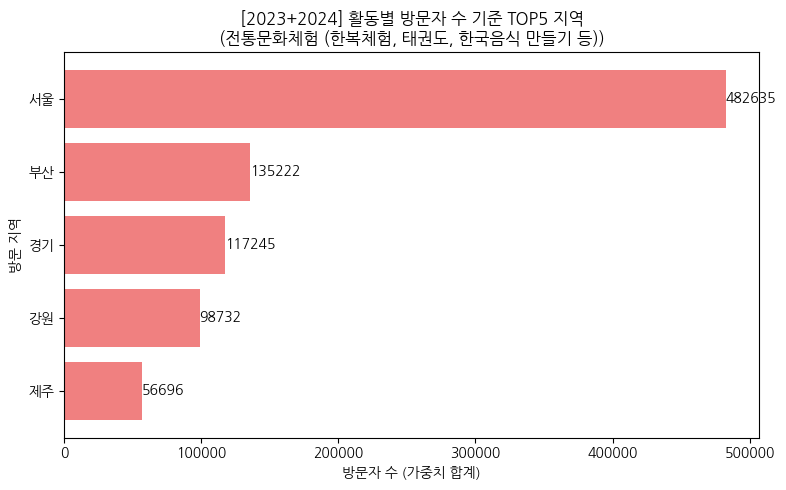

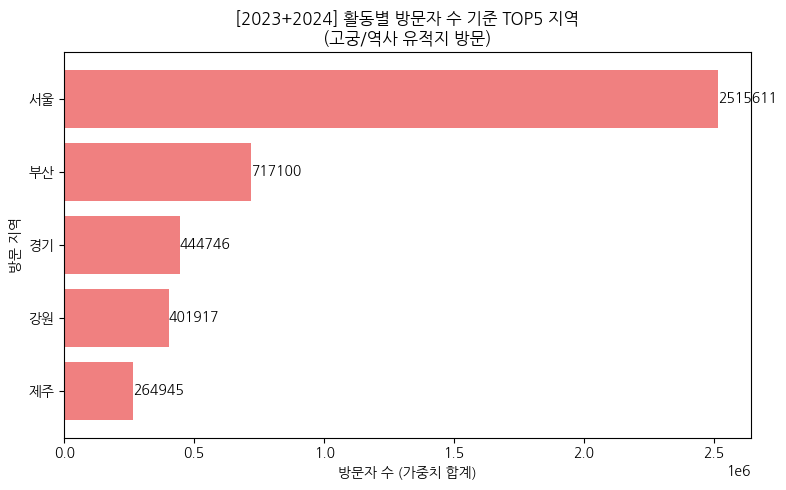

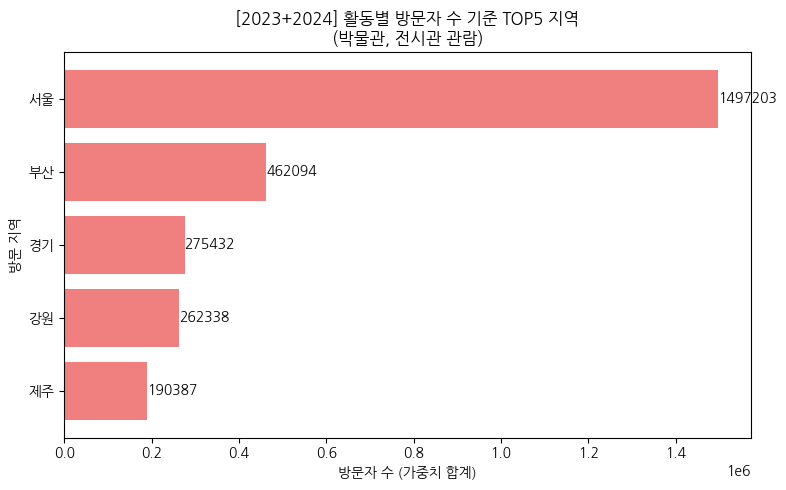

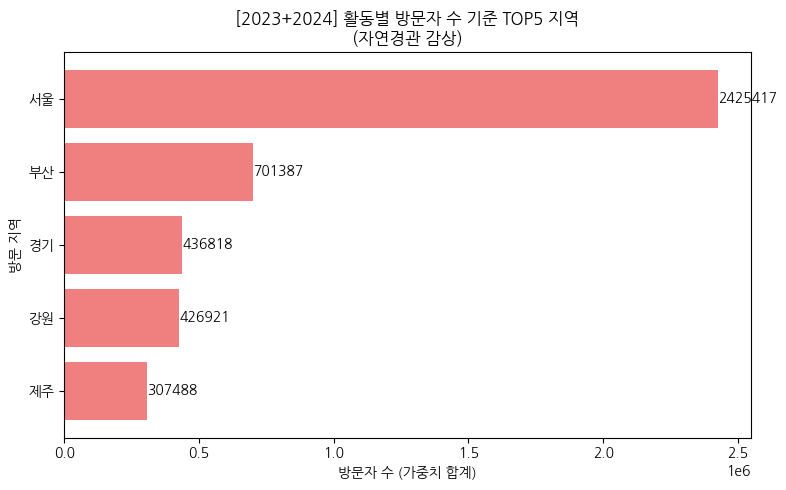

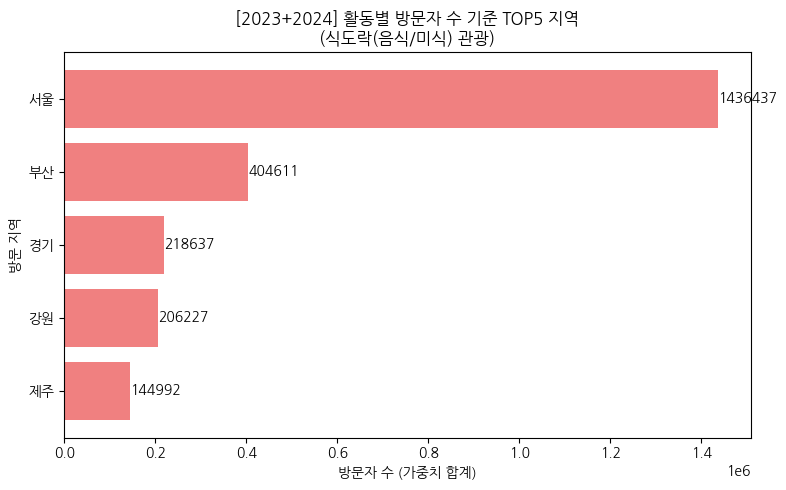

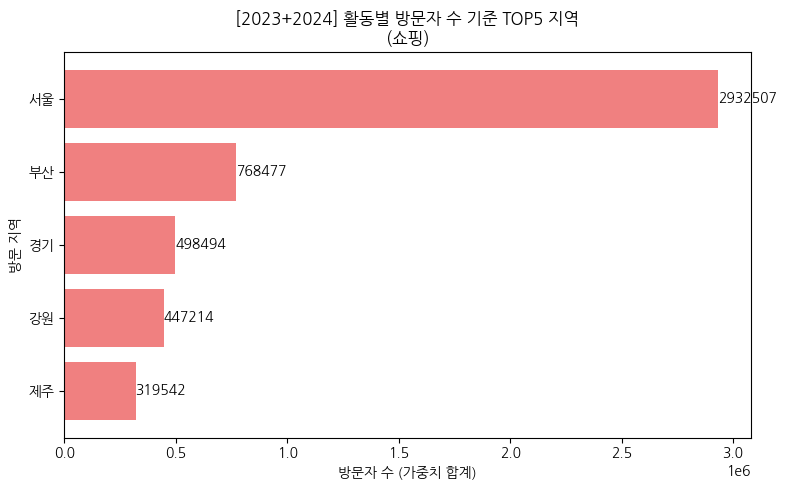

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# 분석 대상 활동 리스트
target_activities = [
    "전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)",
    "고궁/역사 유적지 방문",
    "박물관, 전시관 관람",
    "자연경관 감상",
    "식도락(음식/미식) 관광",
    "쇼핑"
]

# 2023, 2024 필요한 컬럼만 추출 후 병합
df_2023_trimmed = df_cluster1_2023[["활동만족도", "방문지역", "weight"]].copy()
df_2024_trimmed = df_cluster1_2024[["활동만족도", "방문지역", "weight"]].copy()
df_combined = pd.concat([df_2023_trimmed, df_2024_trimmed], ignore_index=True)

# TOP5 지역 추출 함수 (방문자 수 기준)
def extract_top5_regions_by_visitor_count(df, activity_name):
    rows = []
    for _, row in df.iterrows():
        act_dict = row.get("활동만족도", {})
        regions = row.get("방문지역", [])
        weight = row.get("weight", 1)

        if isinstance(act_dict, dict) and activity_name in act_dict:
            for region in regions:
                rows.append({"region": region, "weight": weight})

    region_df = pd.DataFrame(rows)
    if region_df.empty:
        return pd.DataFrame(columns=["region", "total_weight"])

    result = region_df.groupby("region")["weight"].sum().reset_index(name="total_weight")
    result = result.sort_values(by="total_weight", ascending=False).head(5)
    return result

# 시각화 with 수치 표시
for activity in target_activities:
    top5_df = extract_top5_regions_by_visitor_count(df_combined, activity)

    plt.figure(figsize=(8, 5))
    bars = plt.barh(top5_df["region"], top5_df["total_weight"], color="lightcoral")
    plt.gca().invert_yaxis()
    plt.title(f"[2023+2024] 활동별 방문자 수 기준 TOP5 지역\n({activity})")
    plt.xlabel("방문자 수 (가중치 합계)")
    plt.ylabel("방문 지역")

    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.5, bar.get_y() + bar.get_height()/2,
                 f"{width:.0f}", va='center', ha='left', fontsize=10)

    plt.tight_layout()
    plt.show()


# 가중만족도

| 요소              | 설명                                                           |
| --------------- | ------------------------------------------------------------ |
| **방문자 수**       | 특정 지역을 방문한 사람 수 또는 가중치(weight) 합계                            |
| **평균 만족도**      | 활동에 대한 가중 평균 만족도                                             |
| **가중 만족도 점수** | `방문자 수 × 평균 만족도` 로 정의하여 "많이 방문했고 만족도도 높은 곳"에 가중치를 부여 |


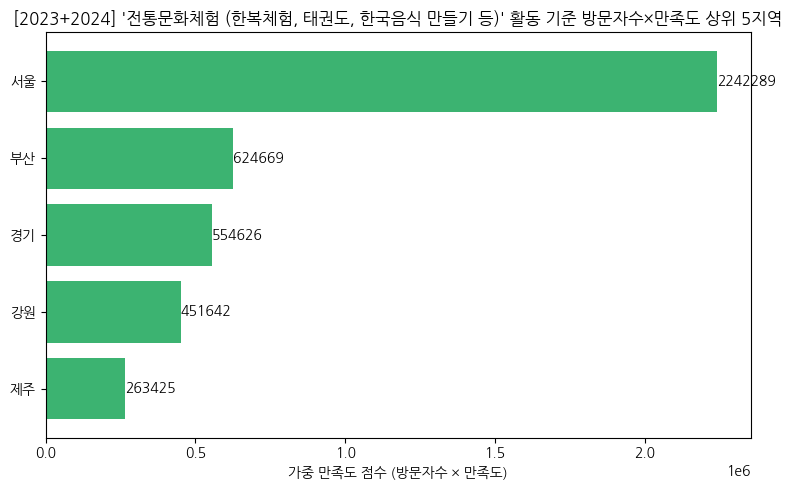

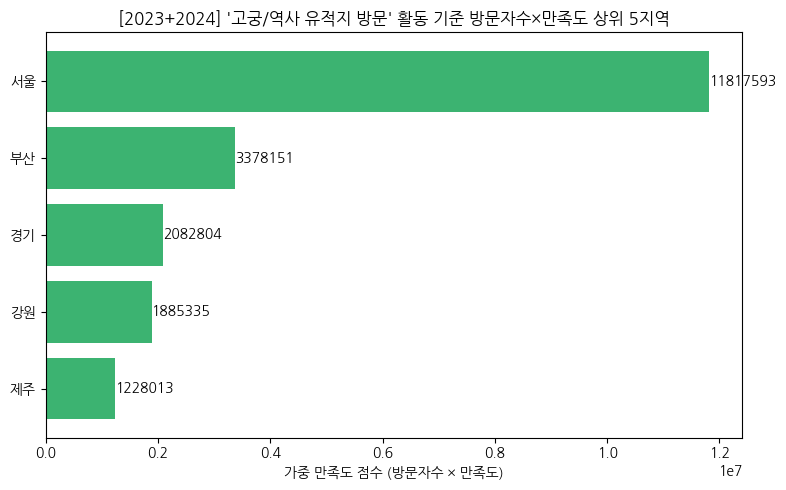

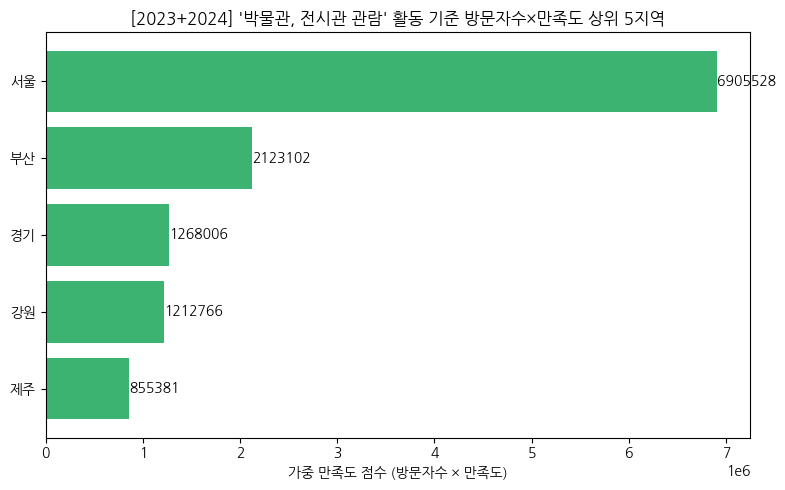

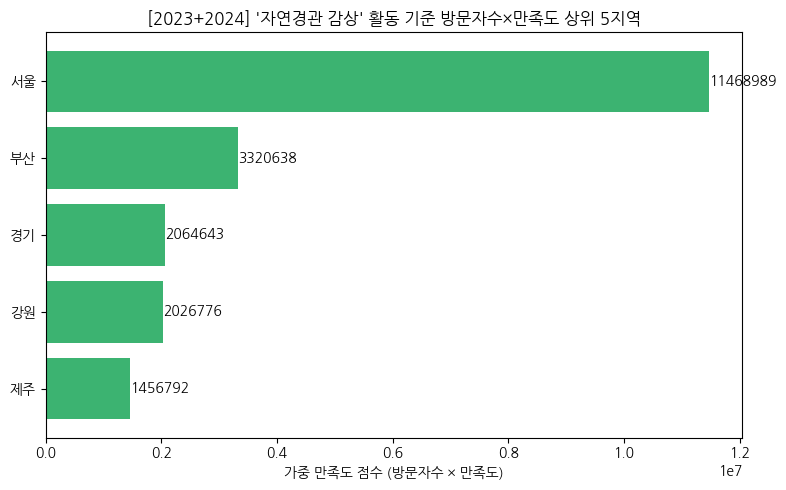

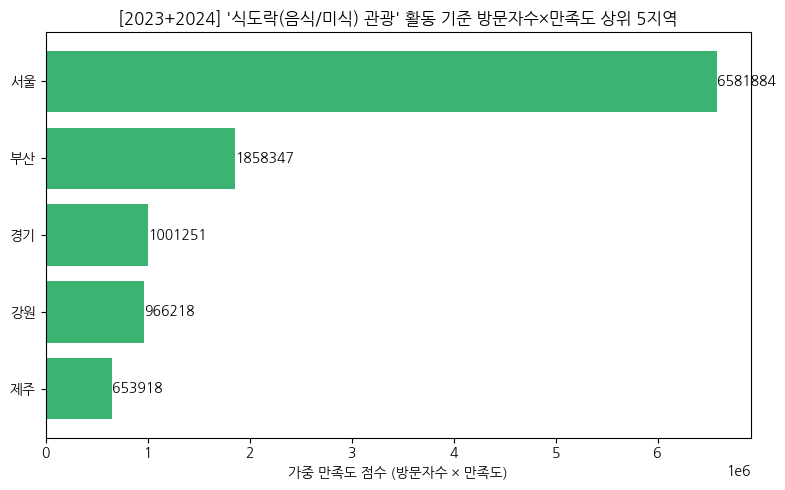

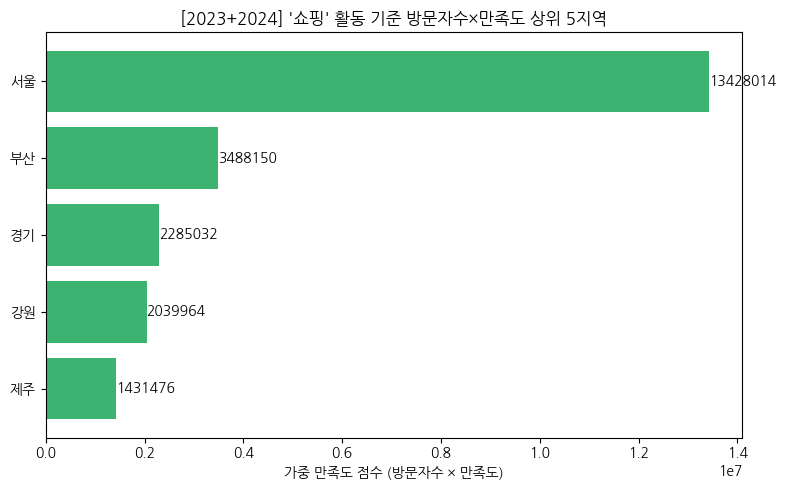

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# 활동 리스트
target_activities = [
    "전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)",
    "고궁/역사 유적지 방문",
    "박물관, 전시관 관람",
    "자연경관 감상",
    "식도락(음식/미식) 관광",
    "쇼핑"
]

# 2023 + 2024 병합
df_2023_trimmed = df_cluster1_2023[["활동만족도", "방문지역", "weight"]].copy()
df_2024_trimmed = df_cluster1_2024[["활동만족도", "방문지역", "weight"]].copy()
df_combined = pd.concat([df_2023_trimmed, df_2024_trimmed], ignore_index=True)

# 지수 기반 TOP5 추출 함수
def extract_top5_by_weighted_score(df, activity_name):
    rows = []
    for _, row in df.iterrows():
        act_dict = row.get("활동만족도", {})
        regions = row.get("방문지역", [])
        weight = row.get("weight", 1)

        if isinstance(act_dict, dict) and activity_name in act_dict:
            score = act_dict[activity_name]
            for region in regions:
                rows.append({
                    "region": region,
                    "score": score,
                    "weight": weight,
                    "weighted_score": score * weight
                })

    df_temp = pd.DataFrame(rows)
    if df_temp.empty:
        return pd.DataFrame(columns=["region", "visitor_count", "avg_score", "weighted_score"])

    summary = df_temp.groupby("region").agg({
        "weight": "sum",
        "score": lambda x: (x * df_temp.loc[x.index, "weight"]).sum() / df_temp.loc[x.index, "weight"].sum(),
        "weighted_score": "sum"
    }).reset_index()

    summary.columns = ["region", "visitor_count", "avg_score", "weighted_score"]
    top5 = summary.sort_values(by="weighted_score", ascending=False).head(5)
    return top5

# 시각화: 바 안에 수치도 출력
for activity in target_activities:
    top5_df = extract_top5_by_weighted_score(df_combined, activity)

    plt.figure(figsize=(8, 5))
    bars = plt.barh(top5_df["region"], top5_df["weighted_score"], color="mediumseagreen")
    plt.gca().invert_yaxis()
    plt.title(f"[2023+2024] '{activity}' 활동 기준 방문자수×만족도 상위 5지역")
    plt.xlabel("가중 만족도 점수 (방문자수 × 만족도)")

    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.5, bar.get_y() + bar.get_height()/2,
                 f"{width:.0f}", va='center', fontsize=10)

    plt.tight_layout()
    plt.show()

# 활동별 지역 비율

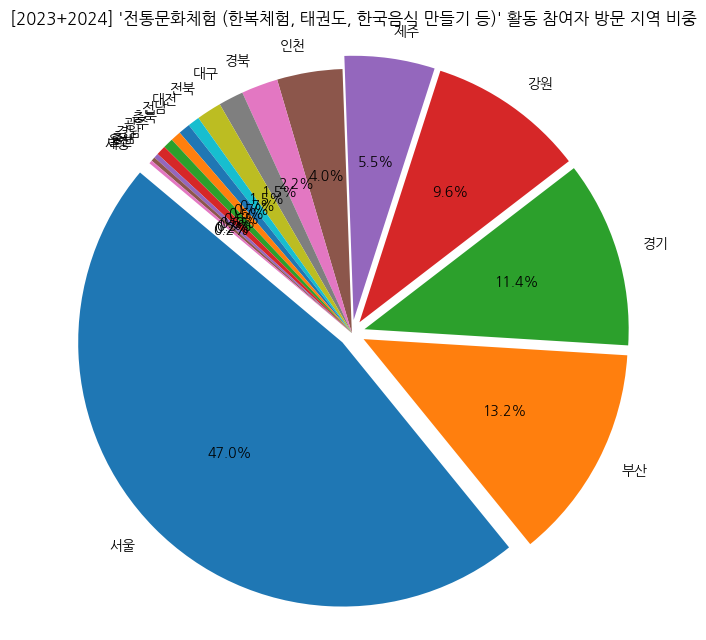

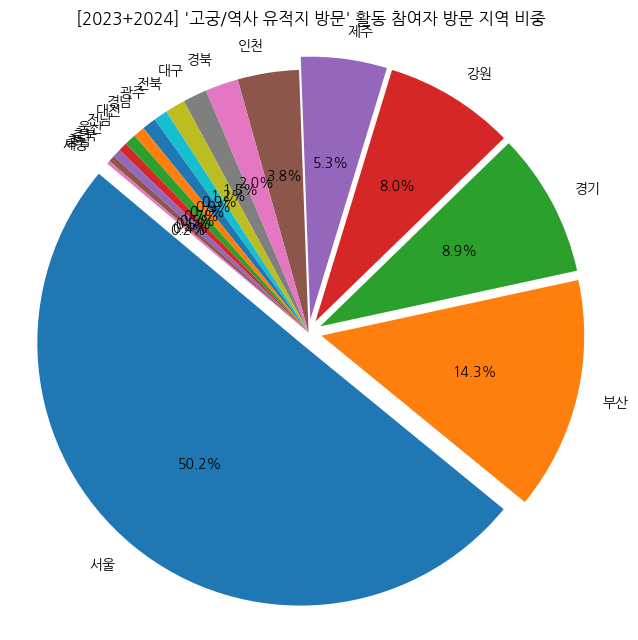

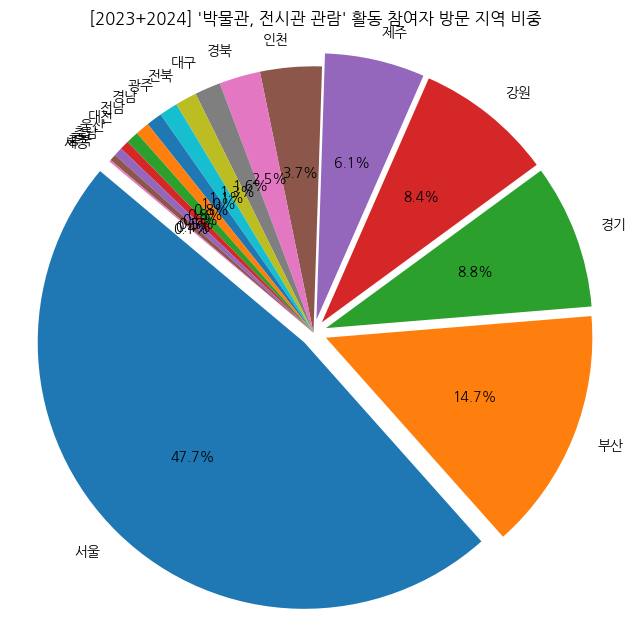

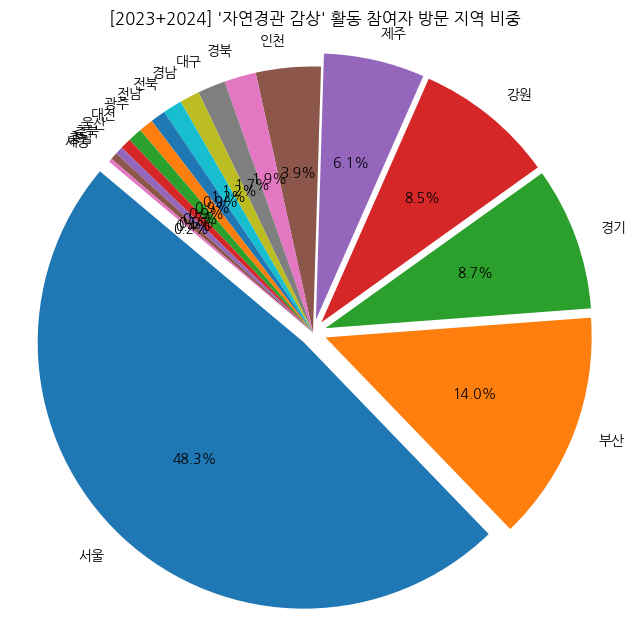

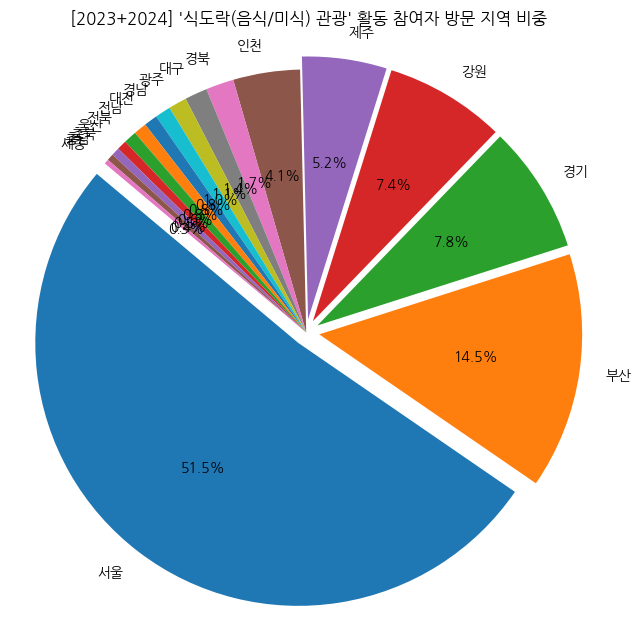

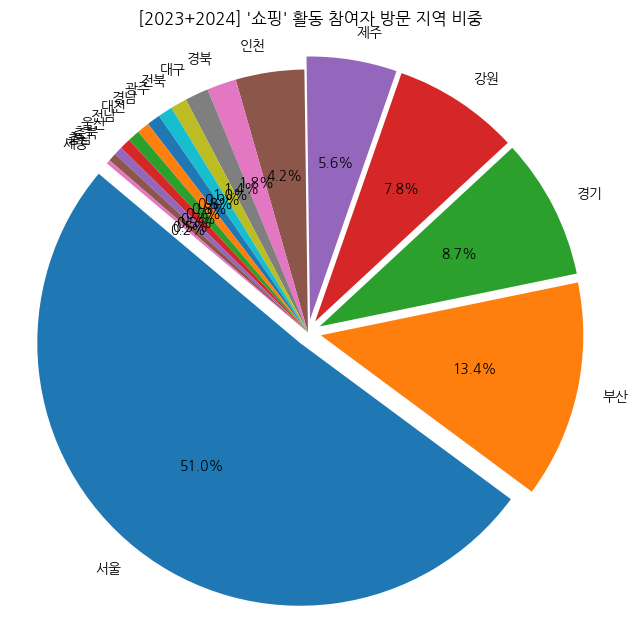

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 분석할 활동 리스트 정의
target_activities = [
    "전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)",
    "고궁/역사 유적지 방문",
    "박물관, 전시관 관람",
    "자연경관 감상",
    "식도락(음식/미식) 관광",
    "쇼핑"
]

# 2. 2023 + 2024 데이터 병합 (활동만족도, 방문지역, weight)
df_2023_trimmed = df_cluster1_2023[["활동만족도", "방문지역", "weight"]].copy()
df_2024_trimmed = df_cluster1_2024[["활동만족도", "방문지역", "weight"]].copy()
df_combined = pd.concat([df_2023_trimmed, df_2024_trimmed], ignore_index=True)

# 3. 활동별 방문 지역 누적 가중치 수집
for activity in target_activities:
    rows = []
    for _, row in df_combined.iterrows():
        act_dict = row.get("활동만족도", {})
        regions = row.get("방문지역", [])
        weight = row.get("weight", 1)

        if isinstance(act_dict, dict) and activity in act_dict and isinstance(regions, list):
            for region in regions:
                rows.append({"region": region, "weight": weight})

    df_act = pd.DataFrame(rows)

    if df_act.empty:
        print(f"[{activity}] 데이터 없음")
        continue

    region_weighted = df_act.groupby("region")["weight"].sum().sort_values(ascending=False)
    total = region_weighted.sum()
    region_share = (region_weighted / total) * 100  # 비율 계산

    # 4. 원형 그래프 시각화
    plt.figure(figsize=(6.5, 6.5))
    explode = [0.05 if i < 5 else 0 for i in range(len(region_share))]  # 상위 5개 강조
    plt.pie(region_share, labels=region_share.index, autopct="%1.1f%%", startangle=140, explode=explode)
    plt.title(f"[2023+2024] '{activity}' 활동 참여자 방문 지역 비중")
    plt.axis("equal")
    plt.tight_layout()
    plt.show()

# 상위지역 제외

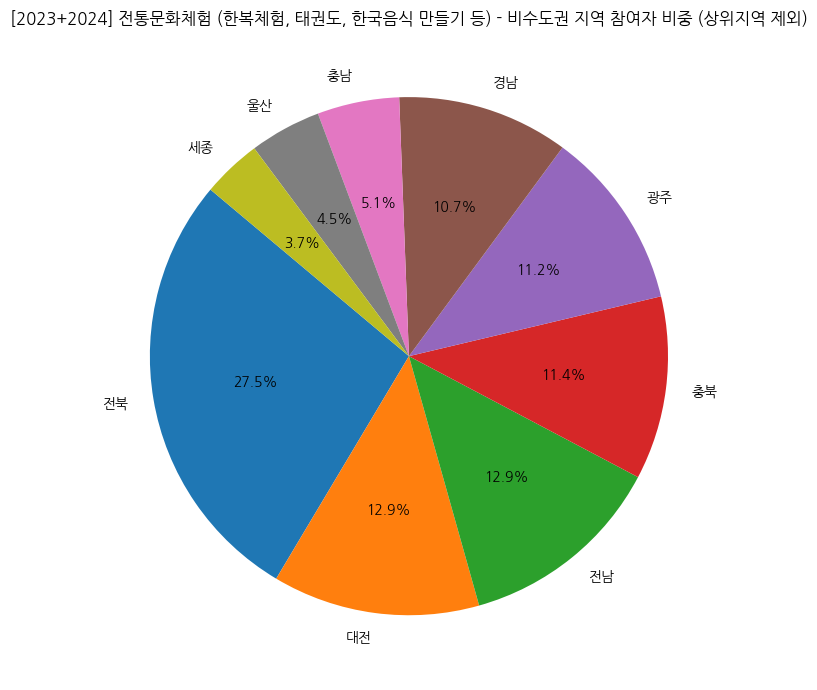

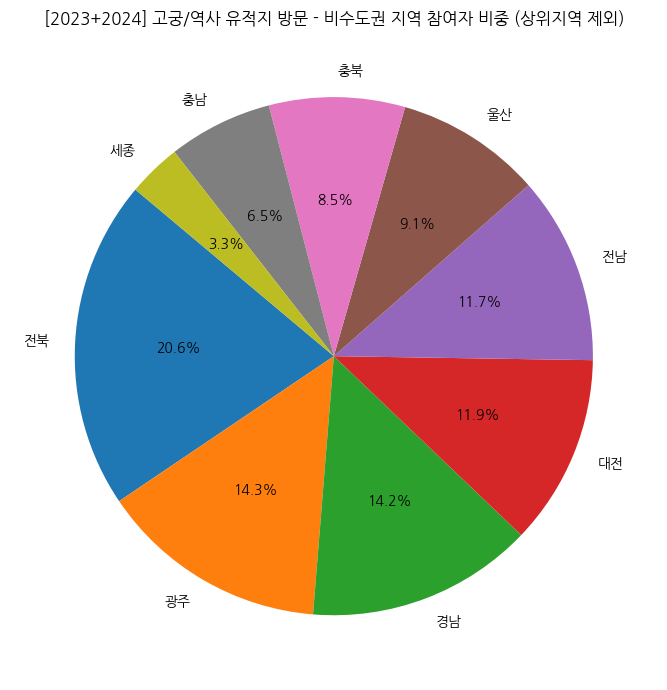

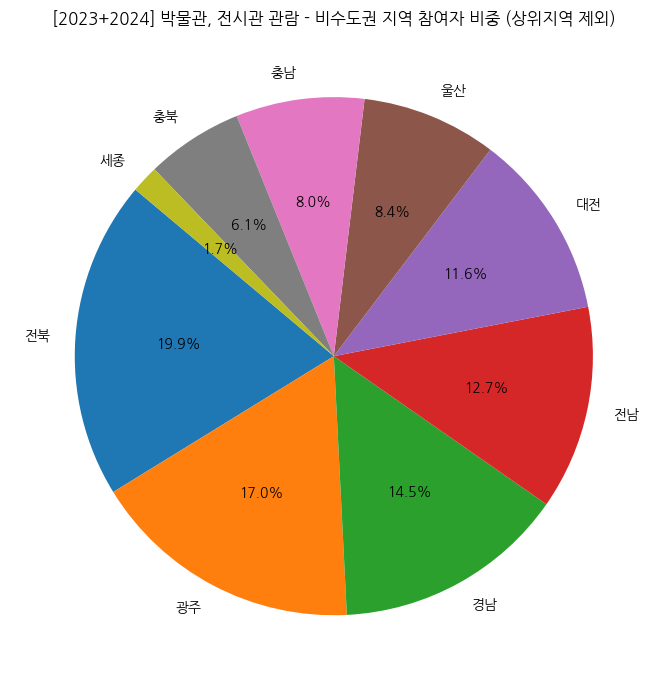

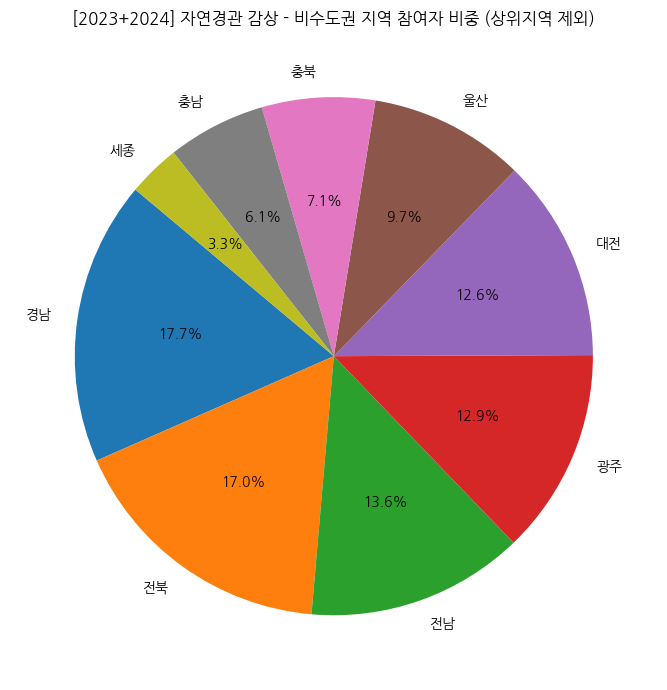

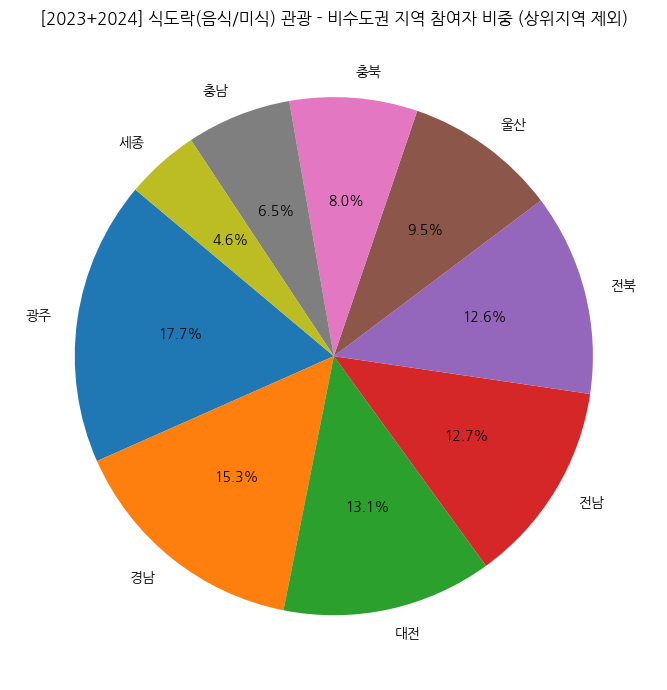

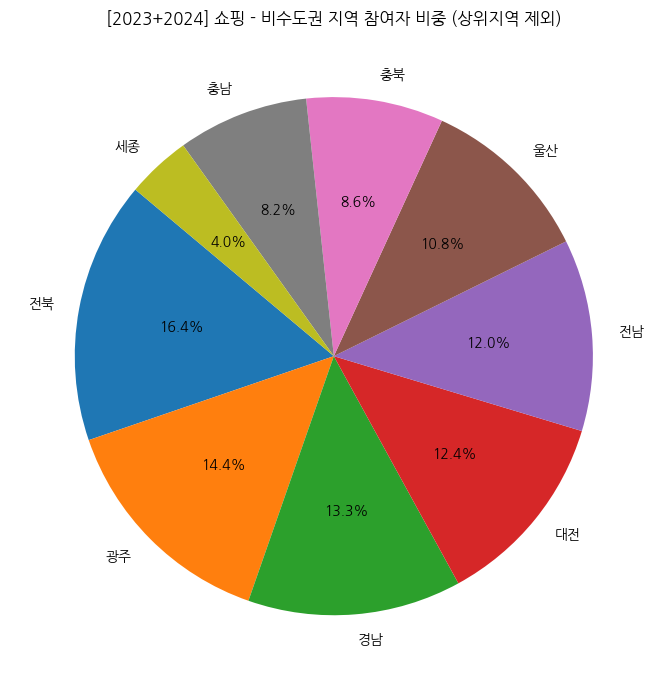

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# 제외할 상위 지역
excluded_regions = ["서울", "경기", "부산", "제주", "강원", "인천","경북","대구"]

# 활동 리스트
target_activities = [
    "전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)",
    "고궁/역사 유적지 방문",
    "박물관, 전시관 관람",
    "자연경관 감상",
    "식도락(음식/미식) 관광",
    "쇼핑"
]

# 2023, 2024 필요한 컬럼만 추출 후 병합
df_2023_trimmed = df_cluster1_2023[["활동만족도", "방문지역", "weight"]].copy()
df_2024_trimmed = df_cluster1_2024[["활동만족도", "방문지역", "weight"]].copy()
df_combined = pd.concat([df_2023_trimmed, df_2024_trimmed], ignore_index=True)

# 활동별 지역 비중 계산 및 시각화
for activity in target_activities:
    rows = []
    for _, row in df_combined.iterrows():
        if activity in row.get("활동만족도", {}) and isinstance(row.get("방문지역", []), list):
            weight = row.get("weight", 1)
            for region in row["방문지역"]:
                if region not in excluded_regions:
                    rows.append((region, weight))

    df_rows = pd.DataFrame(rows, columns=["region", "weight"])
    region_share = df_rows.groupby("region")["weight"].sum()
    region_share = region_share[region_share > 0]  # 0 제거
    region_share = region_share.sort_values(ascending=False)

    # 시각화
    plt.figure(figsize=(7, 7))
    plt.pie(region_share, labels=region_share.index, autopct="%1.1f%%", startangle=140)
    plt.title(f"[2023+2024] {activity} - 비수도권 지역 참여자 비중 (상위지역 제외)")
    plt.tight_layout()
    plt.show()

# 상위 지역(서울, 경기, 부산, 제주, 강원, 인천, 경북, 대구)을 제외하고 가중만족도 보기

각 활동별로 가중 만족도 = 방문자 수 × 평균 만족도를 계산하여
가장 많이 방문했고 만족도도 높은 지역을 시각화하는 막대그래프

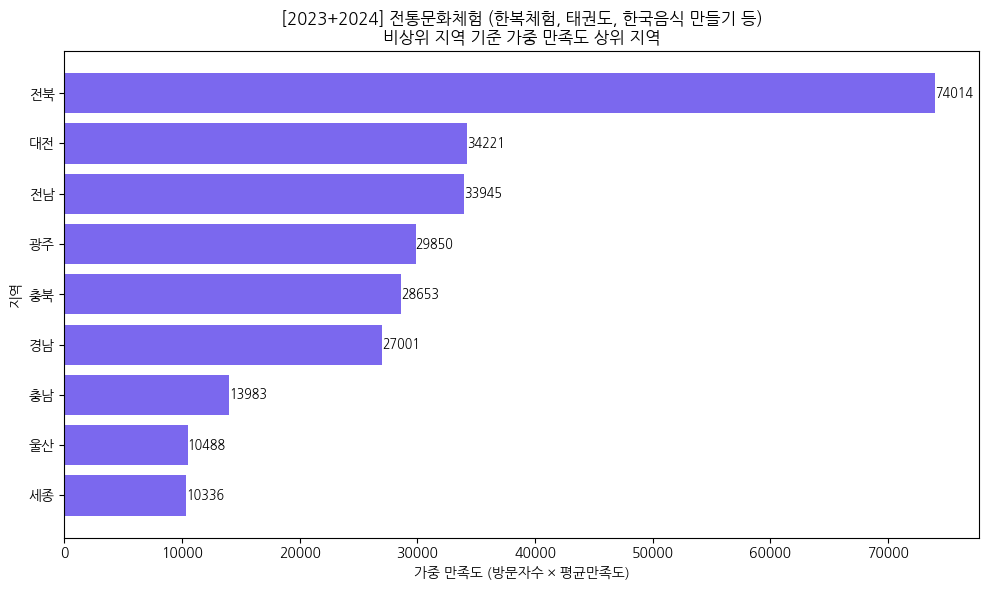

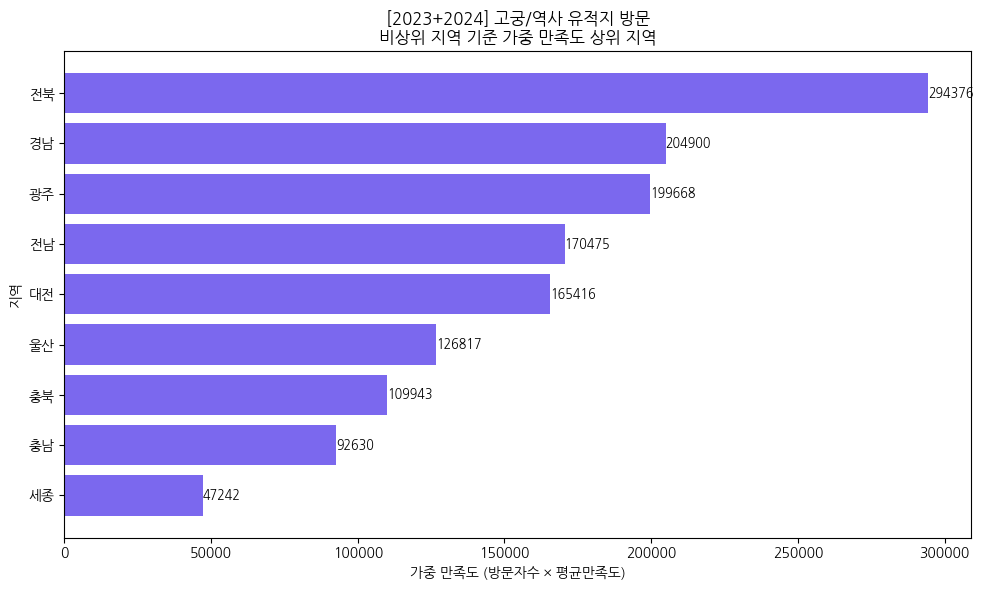

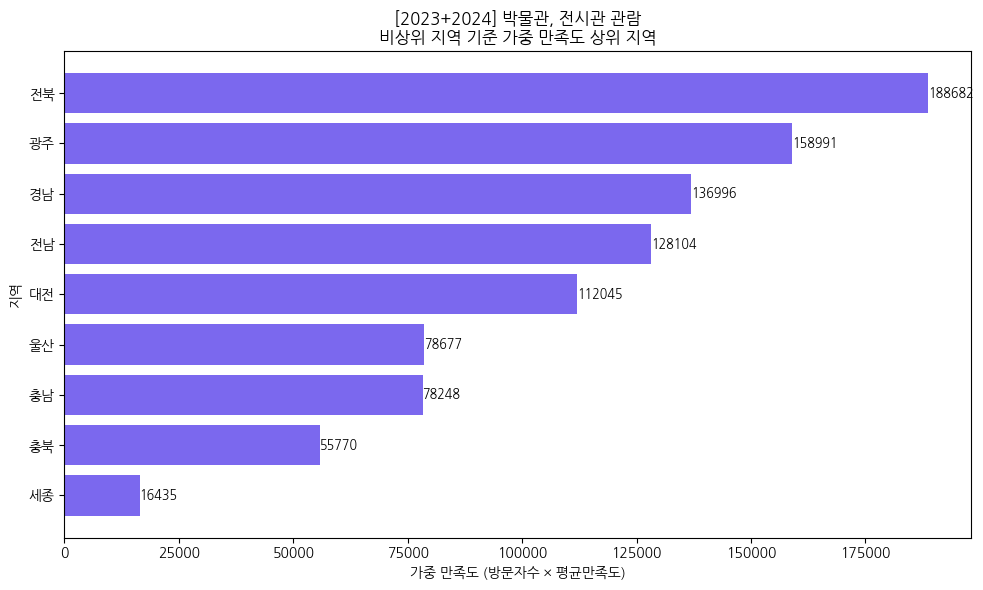

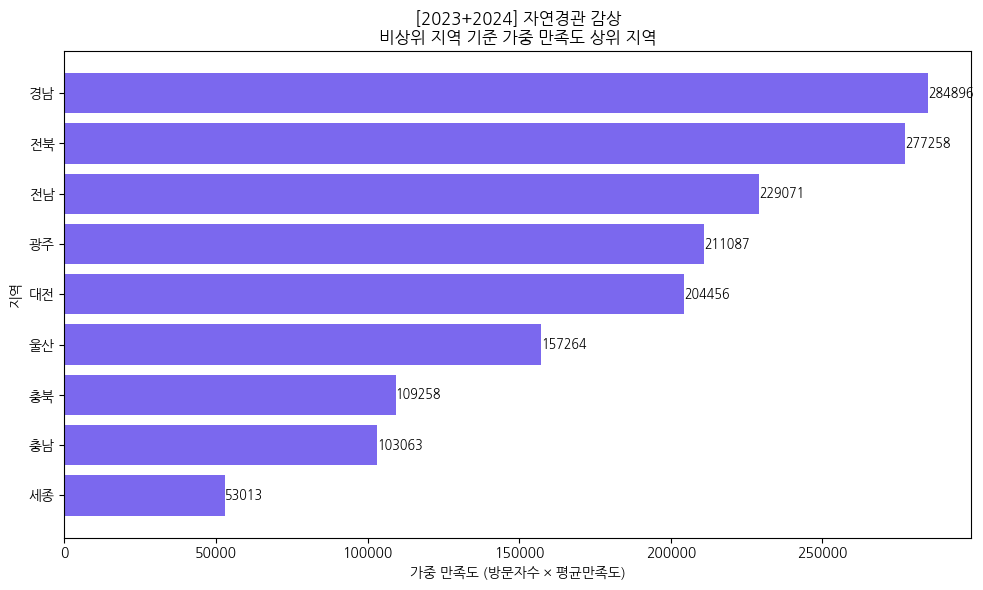

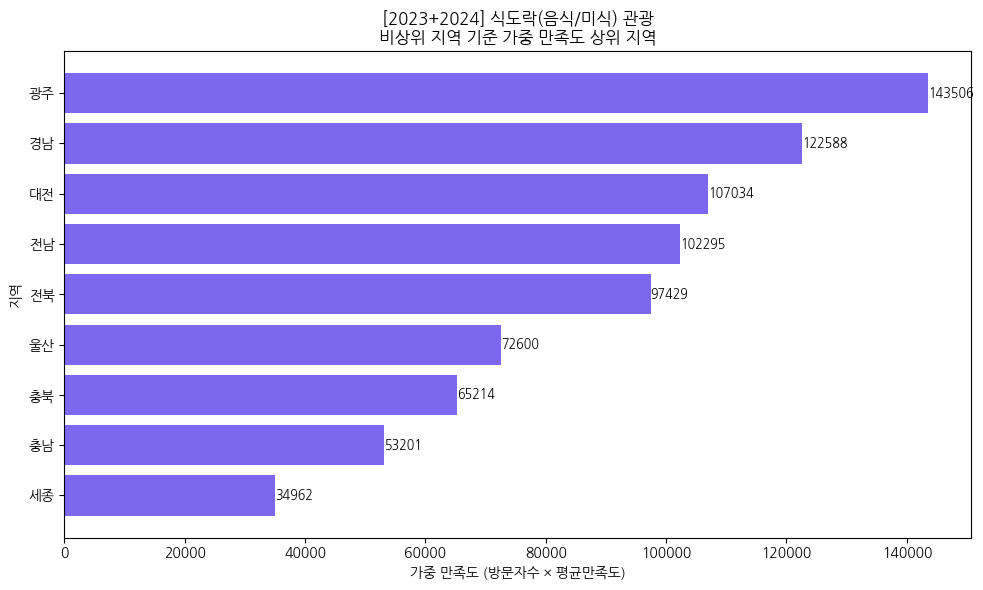

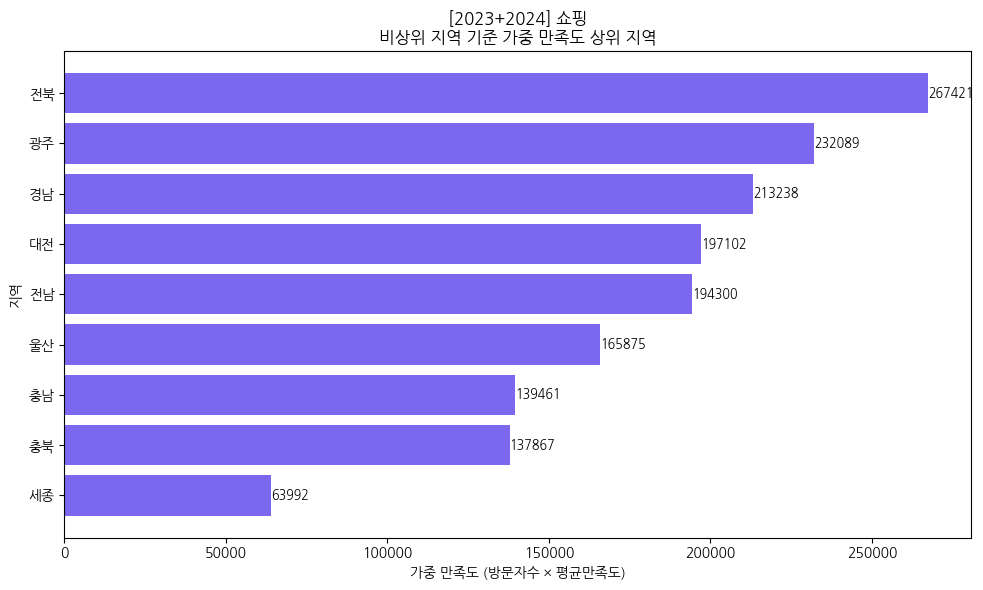

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# 제외할 상위 지역
excluded_regions = ["서울", "경기", "부산", "제주", "강원", "인천", "경북","대구"]

# 대상 활동 리스트
target_activities = [
    "전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)",
    "고궁/역사 유적지 방문",
    "박물관, 전시관 관람",
    "자연경관 감상",
    "식도락(음식/미식) 관광",
    "쇼핑"
]

# 필요한 컬럼만 추출 후 병합
df_2023_trimmed = df_cluster1_2023[["활동만족도", "방문지역", "weight"]].copy()
df_2024_trimmed = df_cluster1_2024[["활동만족도", "방문지역", "weight"]].copy()
df_combined = pd.concat([df_2023_trimmed, df_2024_trimmed], ignore_index=True)

# 활동별 가중 만족도 분석
for activity in target_activities:
    rows = []

    for _, row in df_combined.iterrows():
        act_dict = row.get("활동만족도", {})
        region_list = row.get("방문지역", [])
        weight = row.get("weight", 1)

        if activity in act_dict and isinstance(region_list, list):
            score = act_dict[activity]
            for region in region_list:
                if region not in excluded_regions:
                    rows.append({
                        "region": region,
                        "score": score,
                        "weight": weight
                    })

    df_rows = pd.DataFrame(rows)

    if df_rows.empty:
        continue

    # 방문자 수, 평균 만족도, 가중 만족도 계산
    region_stats = df_rows.groupby("region").agg(
        total_weight=("weight", "sum"),
        avg_score=("score", lambda x: (x * df_rows.loc[x.index, "weight"]).sum() / df_rows.loc[x.index, "weight"].sum())
    ).reset_index()

    region_stats["weighted_satisfaction"] = region_stats["total_weight"] * region_stats["avg_score"]
    region_stats = region_stats.sort_values(by="weighted_satisfaction", ascending=False).head(10)

    # 시각화
    plt.figure(figsize=(10, 6))
    bars = plt.barh(region_stats["region"], region_stats["weighted_satisfaction"], color="mediumslateblue")
    plt.gca().invert_yaxis()
    plt.title(f"[2023+2024] {activity}\n비상위 지역 기준 가중 만족도 상위 지역")
    plt.xlabel("가중 만족도 (방문자수 × 평균만족도)")
    plt.ylabel("지역")

    # 수치 표시
    for bar in bars:
        plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
                 f"{bar.get_width():.0f}", va='center', fontsize=9)

    plt.tight_layout()
    plt.show()

# 전통문화체험

## 전라북도

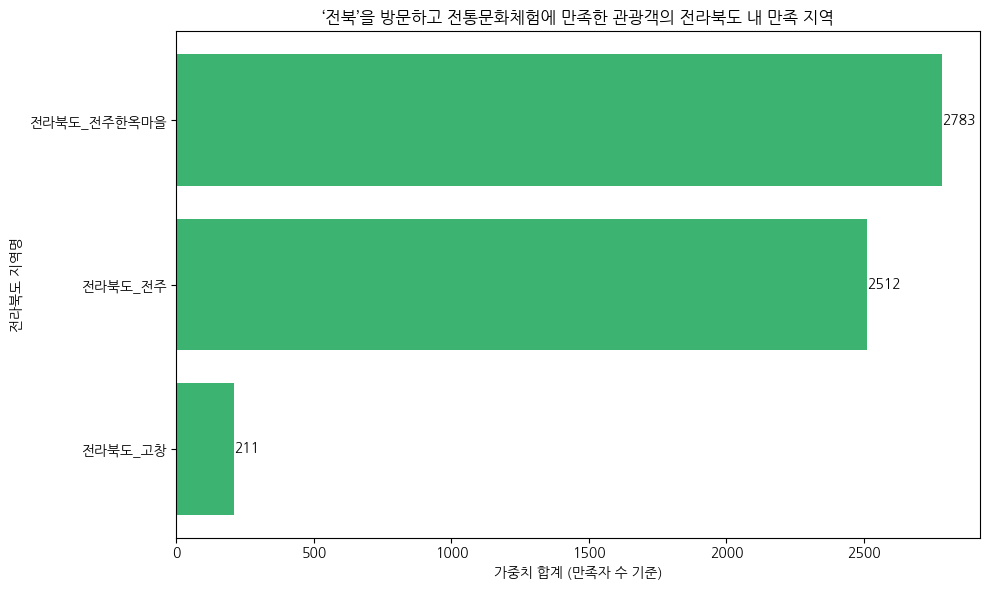

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# 지역 만족 컬럼
satisfied_cols = ['Q9_1_1', 'Q9_1_2', 'Q9_1_3', 'Q9_1_4', 'Q9_1_5']
target_activity = "전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)"

# 전라북도 코드 매핑
jeonbuk_code_map = {
    45001: "전라북도_전주한옥마을", 45002: "전라북도_무주 덕유산리조트", 45003: "전라북도_마산산", 45004: "전라북도_진안 마이산",
    45021: "전라북도_군산 은파호수공원", 45022: "전라북도_군산 선유도", 45023: "전라북도_남원 지리산", 45041: "전라북도_전주 국립무형유산원",
    45501: "전라북도_군산", 45502: "전라북도_전주", 45503: "전라북도_무주군", 45504: "전라북도_고창", 45505: "전라북도_완도",
    45506: "전라북도_익산", 45507: "전라북도_완주", 45508: "전라북도_김제", 45509: "전라북도_정읍", 45510: "전라북도_순창", 45511: "전라북도_남원",
    45901: "전라북도_맛집/카페/주점", 45902: "전라북도_숙박시설", 45903: "전라북도_쇼핑시설", 45904: "전라북도_전통시장",
    45905: "전라북도_체험마을", 45906: "전라북도_종교시설", 45907: "전라북도_교육기관", 45908: "전라북도_뷰티.스파시설",
    45909: "전라북도_오락시설", 45910: "전라북도_유적지/문화재", 45911: "전라북도_바다", 45912: "전라북도_역/터미널/공항",
    45913: "전라북도_동물원/식물원/아쿠아리움", 45914: "전라북도_놀이시설/테마공원", 45915: "전라북도_문화시설",
    45916: "전라북도_전시관/박물관/미술관", 45917: "전라북도_레져스포츠", 45918: "전라북도_관공서",
    45919: "전라북도_공연장/팬미팅", 45920: "전라북도_공원/수목원/휴양림/유원지"
}
jeonbuk_codes = set(jeonbuk_code_map.keys())

# 2023 + 2024 데이터 결합
df_all = pd.concat([df_cluster1_2023.copy(), df_cluster1_2024.copy()], ignore_index=True)

# 전북 포함 여부 필터 함수
def contains_jeonbuk(region_list):
    return any(isinstance(val, str) and ('전북' in val or '전라북도' in val) for val in region_list)

# 필터링
filtered = df_all[
    df_all["만족활동"].apply(lambda x: isinstance(x, list) and target_activity in x) &
    df_all["방문지역"].apply(lambda x: isinstance(x, list) and contains_jeonbuk(x))
]

# 만족 지역 추출
rows = []
for _, row in filtered.iterrows():
    weight = row.get("weight", 1)
    for col in satisfied_cols:
        val = row.get(col)
        try:
            val = int(float(val))
            if val in jeonbuk_codes:
                rows.append((val, weight))
        except:
            continue

# 데이터프레임 변환 및 시각화
df_satis = pd.DataFrame(rows, columns=["region_code", "weight"])
region_score = df_satis.groupby("region_code")["weight"].sum().sort_values(ascending=False)
region_score_named = region_score.rename(index=jeonbuk_code_map)

plt.figure(figsize=(10, 6))
bars = plt.barh(region_score_named.index, region_score_named.values, color="mediumseagreen")
plt.gca().invert_yaxis()
plt.title("‘전북’을 방문하고 전통문화체험에 만족한 관광객의 전라북도 내 만족 지역")
plt.xlabel("가중치 합계 (만족자 수 기준)")
plt.ylabel("전라북도 지역명")

for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.0f}", va='center', fontsize=10)

plt.tight_layout()
plt.show()

## 대전

# 자연경관

## 전북

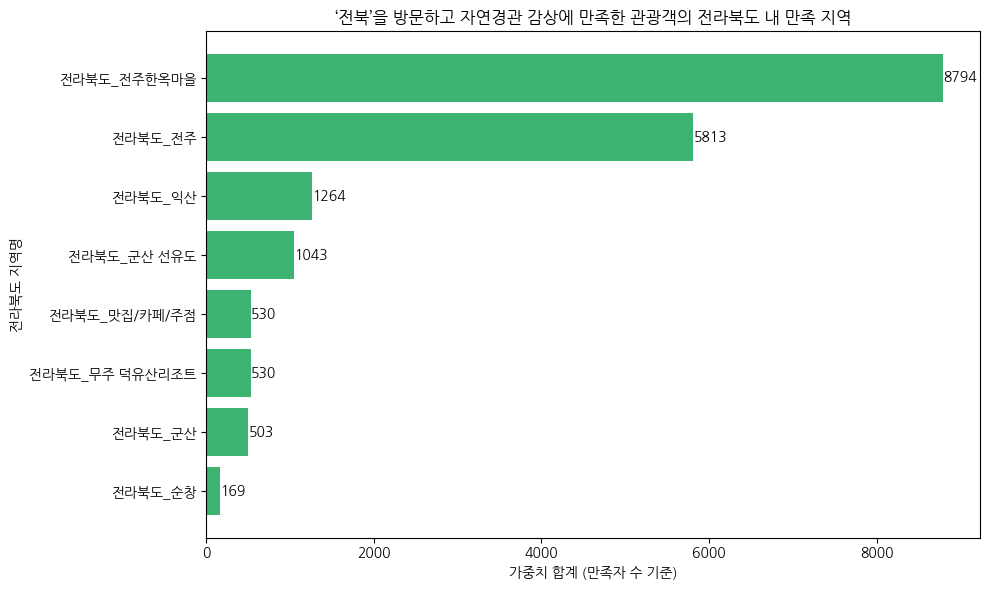

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# 지역 만족 컬럼
satisfied_cols = ['Q9_1_1', 'Q9_1_2', 'Q9_1_3', 'Q9_1_4', 'Q9_1_5']
target_activity = "자연경관 감상"

# 전라북도 코드 매핑
jeonbuk_code_map = {
    45001: "전라북도_전주한옥마을", 45002: "전라북도_무주 덕유산리조트", 45003: "전라북도_마산산", 45004: "전라북도_진안 마이산",
    45021: "전라북도_군산 은파호수공원", 45022: "전라북도_군산 선유도", 45023: "전라북도_남원 지리산", 45041: "전라북도_전주 국립무형유산원",
    45501: "전라북도_군산", 45502: "전라북도_전주", 45503: "전라북도_무주군", 45504: "전라북도_고창", 45505: "전라북도_완도",
    45506: "전라북도_익산", 45507: "전라북도_완주", 45508: "전라북도_김제", 45509: "전라북도_정읍", 45510: "전라북도_순창", 45511: "전라북도_남원",
    45901: "전라북도_맛집/카페/주점", 45902: "전라북도_숙박시설", 45903: "전라북도_쇼핑시설", 45904: "전라북도_전통시장",
    45905: "전라북도_체험마을", 45906: "전라북도_종교시설", 45907: "전라북도_교육기관", 45908: "전라북도_뷰티.스파시설",
    45909: "전라북도_오락시설", 45910: "전라북도_유적지/문화재", 45911: "전라북도_바다", 45912: "전라북도_역/터미널/공항",
    45913: "전라북도_동물원/식물원/아쿠아리움", 45914: "전라북도_놀이시설/테마공원", 45915: "전라북도_문화시설",
    45916: "전라북도_전시관/박물관/미술관", 45917: "전라북도_레져스포츠", 45918: "전라북도_관공서",
    45919: "전라북도_공연장/팬미팅", 45920: "전라북도_공원/수목원/휴양림/유원지"
}
jeonbuk_codes = set(jeonbuk_code_map.keys())

# 2023 + 2024 데이터 결합
df_all = pd.concat([df_cluster1_2023.copy(), df_cluster1_2024.copy()], ignore_index=True)

# 전북 포함 여부 필터 함수
def contains_jeonbuk(region_list):
    return any(isinstance(val, str) and ('전북' in val or '전라북도' in val) for val in region_list)

# 필터링
filtered = df_all[
    df_all["만족활동"].apply(lambda x: isinstance(x, list) and target_activity in x) &
    df_all["방문지역"].apply(lambda x: isinstance(x, list) and contains_jeonbuk(x))
]

# 만족 지역 추출
rows = []
for _, row in filtered.iterrows():
    weight = row.get("weight", 1)
    for col in satisfied_cols:
        val = row.get(col)
        try:
            val = int(float(val))
            if val in jeonbuk_codes:
                rows.append((val, weight))
        except:
            continue

# 데이터프레임 변환 및 시각화
df_satis = pd.DataFrame(rows, columns=["region_code", "weight"])
region_score = df_satis.groupby("region_code")["weight"].sum().sort_values(ascending=False)
region_score_named = region_score.rename(index=jeonbuk_code_map)

plt.figure(figsize=(10, 6))
bars = plt.barh(region_score_named.index, region_score_named.values, color="mediumseagreen")
plt.gca().invert_yaxis()
plt.title("‘전북’을 방문하고 자연경관 감상에 만족한 관광객의 전라북도 내 만족 지역")
plt.xlabel("가중치 합계 (만족자 수 기준)")
plt.ylabel("전라북도 지역명")

for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.0f}", va='center', fontsize=10)

plt.tight_layout()
plt.show()

## 누적그래프

/tmp/ipython-input-12-4276629969.py:40: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pivot = df_expanded.groupby(['region', 'activity']).apply(


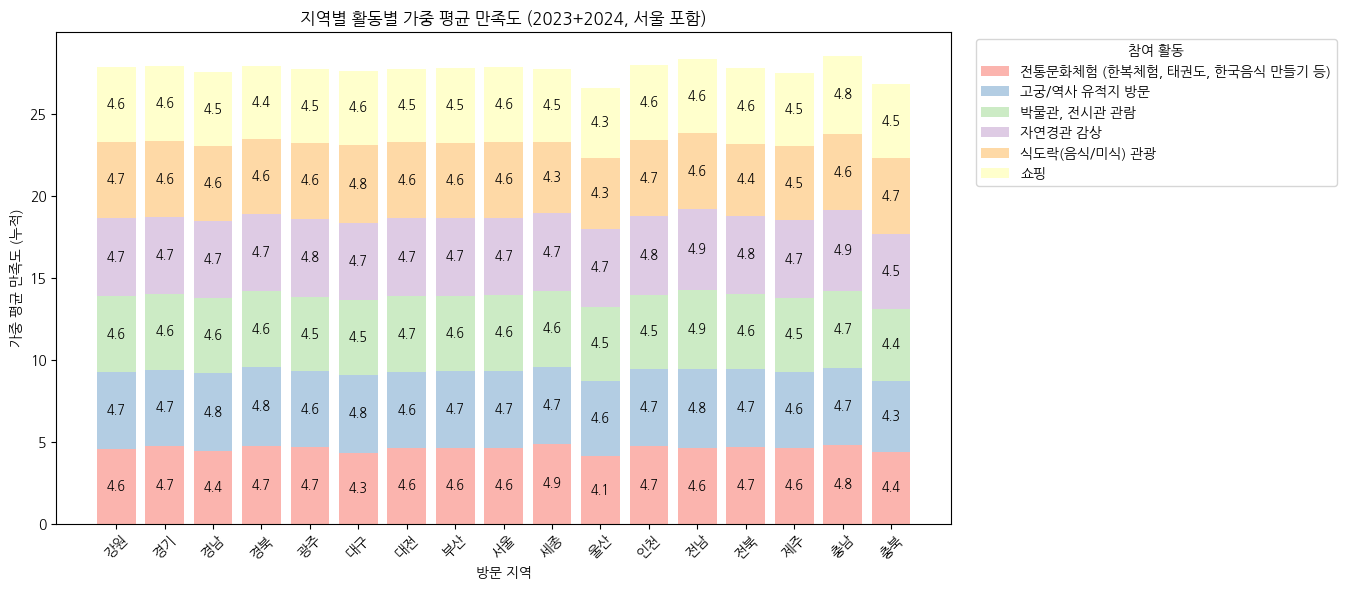

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 1. 활동 리스트 정의
target_activities = [
    "전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)",
    "고궁/역사 유적지 방문",
    "박물관, 전시관 관람",
    "자연경관 감상",
    "식도락(음식/미식) 관광",
    "쇼핑"
]

# 2. 2023, 2024 데이터에서 필요한 컬럼만 추출 후 결합
df_2023_trimmed = df_cluster1_2023[["활동만족도", "방문지역", "weight"]].copy()
df_2024_trimmed = df_cluster1_2024[["활동만족도", "방문지역", "weight"]].copy()
df_combined = pd.concat([df_2023_trimmed, df_2024_trimmed], ignore_index=True)

# 3. 활동-지역 데이터 펼치기 (서울 포함)
rows = []
for _, row in df_combined.iterrows():
    act_dict = row.get("활동만족도", {})
    regions = row.get("방문지역", [])
    weight = row.get("weight", 1)
    if isinstance(act_dict, dict) and isinstance(regions, list):
        for region in regions:  # 서울 포함
            for act in target_activities:
                if act in act_dict:
                    rows.append({
                        "region": region,
                        "activity": act,
                        "score": act_dict[act],
                        "weight": weight
                    })

df_expanded = pd.DataFrame(rows)

# 4. 지역-활동별 가중 평균 계산
pivot = df_expanded.groupby(['region', 'activity']).apply(
    lambda x: (x['score'] * x['weight']).sum() / x['weight'].sum()
).reset_index(name='weighted_mean')

# 5. 피벗 테이블 생성
pivot_table = pivot.pivot(index='activity', columns='region', values='weighted_mean').fillna(0)

# 6. 색상: 파스텔 컬러 사용
colors = cm.Pastel1.colors

# 7. 시각화: 세로 스택형 누적 막대그래프
plt.figure(figsize=(max(10, len(pivot_table.columns) * 0.8), 6))
bottom = [0] * len(pivot_table.columns)
regions = pivot_table.columns.tolist()

for i, activity in enumerate(target_activities):
    values = pivot_table.loc[activity].values
    bars = plt.bar(regions, values, bottom=bottom, label=activity, color=colors[i % len(colors)])

    # 막대 안 수치 표시
    for j, (val, btm) in enumerate(zip(values, bottom)):
        if val > 0.3:
            plt.text(j, btm + val / 2, f"{val:.1f}", ha='center', va='center', fontsize=9, color='black')

    # 누적 업데이트
    bottom = [btm + val for btm, val in zip(bottom, values)]

plt.title("지역별 활동별 가중 평균 만족도 (2023+2024, 서울 포함)")
plt.ylabel("가중 평균 만족도 (누적)")
plt.xlabel("방문 지역")
plt.xticks(rotation=45)
plt.legend(title="참여 활동", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()